learn from https://www.tensorflow.org/tutorials/images/transfer_learning

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
import tensorflow as tf
from tensorflow import keras
import keras.layers as tfl
import seaborn as sn
import dataset

Get English dataset

In [76]:
dataset_collection = dataset.getMFCCDatasetRAVDESS(train_size = 0.6, valid_size = 0.2, test_size = 0.2, cut = False, emotion_number = 3, max_wid = 32, max_len = 1841)

eng_X_train = dataset_collection['X_train']
eng_Y_train = dataset_collection['Y_train']
eng_X_valid = dataset_collection['X_valid']
eng_Y_valid = dataset_collection['Y_valid']
eng_X_test = dataset_collection['X_test']
eng_Y_test = dataset_collection['Y_test']

eng_X_train_norm = dataset_collection['X_train_norm']
eng_X_valid_norm = dataset_collection['X_valid_norm']
eng_X_test_norm = dataset_collection['X_test_norm']

f:\Shitford\Lectures\22fall\CS230\cs230\dataset.py:49: RuntimeWarning: invalid value encountered in true_divide
  X_train_norm = (X_train - X_train_miu)/X_train_std
f:\Shitford\Lectures\22fall\CS230\cs230\dataset.py:50: RuntimeWarning: invalid value encountered in true_divide
  X_valid_norm = (X_valid - X_valid_miu)/X_valid_std
f:\Shitford\Lectures\22fall\CS230\cs230\dataset.py:51: RuntimeWarning: invalid value encountered in true_divide
  X_test_norm = (X_test - X_test_miu)/X_test_std


Get Japanese dataset

In [2]:
# get Japanese data
# interfacce function to get splited dataset
# resize all audio to (19, 1841) matrix
# 1841 is the max size of Japanese audio
dataset_collection = dataset.getMFCCDataset(train_size = 0.6, valid_size = 0.2, test_size = 0.2, cut = False, max_wid = 32, max_len = 1841)

jap_X_train = dataset_collection['X_train']
jap_Y_train = dataset_collection['Y_train']
jap_X_valid = dataset_collection['X_valid']
jap_Y_valid = dataset_collection['Y_valid']
jap_X_test = dataset_collection['X_test']
jap_Y_test = dataset_collection['Y_test']

jap_X_train_norm = dataset_collection['X_train_norm']
jap_X_valid_norm = dataset_collection['X_valid_norm']
jap_X_test_norm = dataset_collection['X_test_norm']

# convert array to tensor
# jap_X_train_norm = tf.convert_to_tensor(jap_X_train_norm)
# jap_X_valid_norm = tf.convert_to_tensor(jap_X_valid_norm)
# jap_X_test_norm = tf.convert_to_tensor(jap_X_test_norm)
# jap_Y_train = tf.convert_to_tensor(jap_Y_train)
# jap_Y_valid = tf.convert_to_tensor(jap_Y_valid)
# jap_Y_test = tf.convert_to_tensor(jap_Y_test)

# jap_X_train = tf.convert_to_tensor(jap_X_train)
# jap_X_valid = tf.convert_to_tensor(jap_X_valid)
# jap_X_test = tf.convert_to_tensor(jap_X_test)

f:\Shitford\Lectures\22fall\CS230\cs230\dataset.py:49: RuntimeWarning: invalid value encountered in true_divide
  X_train_norm = (X_train - X_train_miu)/X_train_std
f:\Shitford\Lectures\22fall\CS230\cs230\dataset.py:50: RuntimeWarning: invalid value encountered in true_divide
  X_valid_norm = (X_valid - X_valid_miu)/X_valid_std
f:\Shitford\Lectures\22fall\CS230\cs230\dataset.py:51: RuntimeWarning: invalid value encountered in true_divide
  X_test_norm = (X_test - X_test_miu)/X_test_std


In [91]:
# input pic size is same as spec matrix size (19, 1841)
# new dim = 3, because it is required by MobileNetV2, input at least should be (32, 32, 3)
input_shape = (jap_X_train_norm.shape[1], jap_X_train_norm.shape[2], 3)
print(input_shape)

(32, 1841, 3)


In [4]:
# transfer dataset from array to list
# X_train_norm_list = []
# for i in range(len(jap_X_train_norm)):
#     temp_feature_batch = np.resize(jap_X_train_norm[i], input_shape)
#     X_train_norm_list.append(temp_feature_batch)

# X_valid_norm_list = []
# for i in range(len(jap_X_valid_norm)):
#     temp_feature_batch = np.resize(jap_X_valid_norm[i], input_shape)
#     X_valid_norm_list.append(temp_feature_batch)

# X_test_norm_list = []
# for i in range(len(jap_X_test_norm)):
#     temp_feature_batch = np.resize(jap_X_test_norm[i], input_shape)
#     X_test_norm_list.append(temp_feature_batch)

# Y_train_list = list(jap_Y_train)
# Y_valid_list = list(jap_Y_valid)
# Y_test_list = list(jap_Y_test)


Resize data to 3 dims

MobileNetV2 requires input at least (32, 32, 3)

In [92]:
jap_X_train_norm_resize = np.resize(jap_X_train_norm, (len(jap_X_train_norm), jap_X_train_norm.shape[1], jap_X_train_norm.shape[2], 3))
jap_X_valid_norm_resize = np.resize(jap_X_valid_norm, (len(jap_X_valid_norm), jap_X_valid_norm.shape[1], jap_X_valid_norm.shape[2], 3))
jap_X_test_norm_resize = np.resize(jap_X_test_norm, (len(jap_X_test_norm), jap_X_test_norm.shape[1], jap_X_test_norm.shape[2], 3))

eng_X_train_norm_resize = np.resize(eng_X_train_norm, (len(eng_X_train_norm), eng_X_train_norm.shape[1], eng_X_train_norm.shape[2], 3))
eng_X_valid_norm_resize = np.resize(eng_X_valid_norm, (len(eng_X_valid_norm), eng_X_valid_norm.shape[1], eng_X_valid_norm.shape[2], 3))
eng_X_test_norm_resize = np.resize(eng_X_test_norm, (len(eng_X_test_norm), eng_X_test_norm.shape[1], eng_X_test_norm.shape[2], 3))



In [93]:
# X_train_norm = tf.convert_to_tensor(np.array(X_train_norm_list))
# X_valid_norm = tf.convert_to_tensor(np.array(X_valid_norm_list))
# X_test_norm = tf.convert_to_tensor(np.array(X_test_norm_list))

X_train_norm = tf.convert_to_tensor(np.array(jap_X_train_norm_resize))
X_valid_norm = tf.convert_to_tensor(np.array(jap_X_valid_norm_resize))
X_test_norm = tf.convert_to_tensor(np.array(jap_X_test_norm_resize))

Y_train = tf.convert_to_tensor(jap_Y_train)
Y_valid = tf.convert_to_tensor(jap_Y_valid)
Y_test = tf.convert_to_tensor(jap_Y_test)


Load pretrained model

use model 'MobileNetV2'

In [79]:
# load pretrained model
# weights = 'imagenet', means use pretrained parameters
base_model = tf.keras.applications.MobileNetV2(input_shape=input_shape,
                                               include_top=False,
                                               weights='imagenet')

base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 32, 1841, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 16, 921, 32)  864         ['input_15[0][0]']               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 16, 921, 32)  128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 16, 921, 32)  0           ['bn_Conv1[0][

Advanced features are extraxted by MobileNetV2

In [35]:
# feature extracted
feature_batch = []
for i in range(len(jap_X_train_norm)):
    temp_feature_batch = np.resize(jap_X_train_norm[i], (1, jap_X_train_norm.shape[1], jap_X_train_norm.shape[2], 3))
    ith_feature_batch = base_model(temp_feature_batch)
    feature_batch.append(ith_feature_batch)


In [9]:
feature_batch_average = []
for i in range(len(feature_batch)):
    ith_feature_batch_average = tf.keras.layers.GlobalAveragePooling2D()(feature_batch[i])
    feature_batch_average.append(ith_feature_batch_average)
print(np.array(feature_batch_average).shape)

(540, 1, 1280)


Apply pretrained model on Japanese dataset

In [125]:
def pretrained_model(input_shape):
    # keep pretrained model MobileNetV2 untrainable
    base_model.trainable = False
    
    inputs = tf.keras.Input(input_shape)
    # x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs) # data already preprocessed
    # set training to False to avoid keeping track of statistics in the batch norm layer
    x = base_model(inputs, training=False) 
    
    # # add the new category classification layers
    # # use global avg pooling to summarize the info in each channel
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    # # include dropout with probability of 0.2 to avoid overfitting
    x = tf.keras.layers.Dropout(0.5)(x)

    # # use a prediction layer with three neuron (as three emotions in Japanese dataset)
    outputs = tf.keras.layers.Dense(3)(x)
    
    model = tf.keras.Model(inputs, outputs)

    return model

In [126]:
base_learning_rate = 0.01
jap_pretrained_model = pretrained_model(input_shape)
jap_pretrained_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = base_learning_rate),
                loss=tf.keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
            #   loss=tf.keras.losses.categorical_crossentropy,
            #   metrics=[tf.keras.metrics.Accuracy()])
jap_pretrained_model.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 32, 1841, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 1, 58, 1280)      2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_58  (None, 1280)             0         
 0 (GlobalAveragePooling2D)                                      
                                                                 
 dropout_16 (Dropout)        (None, 1280)              0         
                                                                 
 dense_17 (Dense)            (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-traina

In [127]:
history = jap_pretrained_model.fit(X_train_norm,
                    Y_train,
                    epochs=20,
                    validation_data=(X_valid_norm, Y_valid))

Epoch 1/20
17/17 [==============================] - 34s 2s/step - loss: 9.8748 - accuracy: 0.3296 - val_loss: 10.7454 - val_accuracy: 0.3333
Epoch 2/20
17/17 [==============================] - 26s 2s/step - loss: 10.6559 - accuracy: 0.3333 - val_loss: 10.7454 - val_accuracy: 0.3333
Epoch 3/20
17/17 [==============================] - 26s 2s/step - loss: 10.7155 - accuracy: 0.3333 - val_loss: 10.7454 - val_accuracy: 0.3333
Epoch 4/20
17/17 [==============================] - 26s 2s/step - loss: 10.7155 - accuracy: 0.3333 - val_loss: 10.7454 - val_accuracy: 0.3333
Epoch 5/20
17/17 [==============================] - 25s 1s/step - loss: 10.8051 - accuracy: 0.3333 - val_loss: 10.7454 - val_accuracy: 0.3333
Epoch 6/20
17/17 [==============================] - 26s 2s/step - loss: 10.7155 - accuracy: 0.3333 - val_loss: 10.7454 - val_accuracy: 0.3333
Epoch 7/20
17/17 [==============================] - 25s 1s/step - loss: 10.6559 - accuracy: 0.3333 - val_loss: 10.7454 - val_accuracy: 0.3333
Epoch 8

E:\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

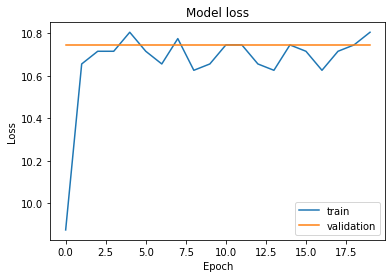

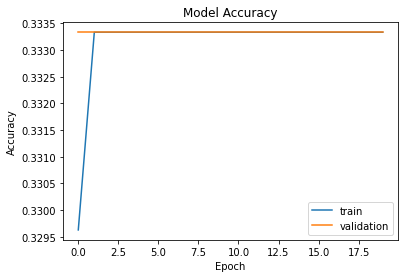

In [128]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(6,4)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(6,4)).set(xlabel='Epoch',ylabel='Accuracy')

6/6 [==============================] - 11s 1s/step
[[128.8322   -37.38932  -64.85631 ]
 [128.86578  -37.432312 -64.99027 ]
 [128.45366  -37.61841  -64.7758  ]
 [128.63333  -37.443718 -64.94226 ]
 [128.50998  -37.414433 -64.92079 ]
 [128.72156  -37.91844  -65.02054 ]
 [128.70512  -37.82721  -65.056564]
 [128.54486  -37.739166 -64.90411 ]
 [128.57687  -37.759487 -64.77275 ]
 [128.58727  -37.798405 -65.002335]
 [128.72856  -37.48766  -64.88217 ]
 [128.64458  -37.243538 -64.90938 ]
 [128.53403  -37.95007  -64.85368 ]
 [128.55994  -37.600708 -64.87222 ]
 [128.53836  -37.765755 -65.00139 ]
 [128.57147  -37.789505 -64.99297 ]
 [128.82826  -37.969627 -65.269035]
 [128.63213  -37.823833 -64.992615]
 [128.66333  -37.320442 -64.77974 ]
 [128.63368  -37.81379  -64.98561 ]
 [128.7472   -37.339577 -64.87288 ]
 [128.53926  -37.80143  -64.85186 ]
 [128.38652  -37.603325 -64.66219 ]
 [128.71976  -37.457478 -64.92427 ]
 [128.4298   -37.67342  -64.70459 ]
 [128.85547  -37.408585 -64.970894]
 [128.52425  

[Text(0.5, 15.0, 'prediction'), Text(33.0, 0.5, 'actual')]

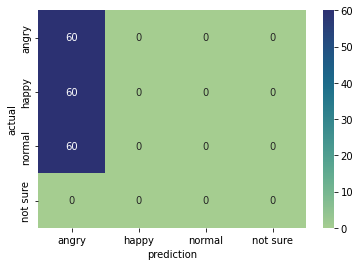

In [129]:
Y_pred = jap_pretrained_model.predict(X_test_norm)
Y_test_numpy = Y_test.numpy()
emotion_pred = []
emotion_test = []
print(Y_pred)
for i in range(len(Y_pred)):
    if (Y_pred[i][0] > 0.5):
        emotion_pred.append(0) # angry
    elif (Y_pred[i][1] > 0.5):
        emotion_pred.append(1) # happy
    elif (Y_pred[i][2] > 0.5):
        emotion_pred.append(2) # normal
    else:
        emotion_pred.append(3) # not decided

    if (Y_test_numpy[i][0] > 0.5):
        emotion_test.append(0)
    elif (Y_test_numpy[i][1] > 0.5):
        emotion_test.append(1)
    elif (Y_test_numpy[i][2] > 0.5):
        emotion_test.append(2)

emotion_test = tf.convert_to_tensor(emotion_test)
emotion_pred = tf.convert_to_tensor(emotion_pred)

confusion = tf.math.confusion_matrix(emotion_test, emotion_pred, num_classes = 4)

df=pd.DataFrame(confusion.numpy(),index=['angry', 'happy', 'normal', 'not sure'],columns=['angry', 'happy', 'normal', 'not sure'])
confusiton_map = sn.heatmap(df,annot=True, cmap='crest')
confusiton_map.set(xlabel="prediction", ylabel="actual")

fine tune

In [130]:
def transfer_pretrained_model(input_shape):
    # keep pretrained model MobileNetV2 trainable
    base_model.trainable = True

    # Fine-tune from this layer onwards
    # total layer number of MobileNetV2 is 154
    fine_tune_at = 151

    # Freeze all the layers before the `fine_tune_at` layer
    for layer in base_model.layers[:fine_tune_at]:
      layer.trainable = False
    
    inputs = tf.keras.Input(input_shape)
    # x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs)
    # set training to False to avoid keeping track of statistics in the batch norm layer
    x = base_model(inputs, training=False) 
    
    # # add the new category classification layers
    # # use global avg pooling to summarize the info in each channel
    x = tf.keras.layers.GlobalAveragePooling2D()(x)

    # # include dropout with probability of 0.2 to avoid overfitting
    x = tf.keras.layers.Dropout(0.5)(x)

    # # use a prediction layer with three neuron (as three emotions in Japanese dataset)
    outputs = tf.keras.layers.Dense(3)(x)
    
    model = tf.keras.Model(inputs, outputs)

    return model

In [131]:
jap_transfer_pretrained_model = transfer_pretrained_model(input_shape)
jap_transfer_pretrained_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = base_learning_rate),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
            #   loss=tf.keras.losses.categorical_crossentropy,
            #   metrics=[tf.keras.metrics.Accuracy()])
jap_transfer_pretrained_model.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 32, 1841, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 1, 58, 1280)      2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_58  (None, 1280)             0         
 1 (GlobalAveragePooling2D)                                      
                                                                 
 dropout_17 (Dropout)        (None, 1280)              0         
                                                                 
 dense_18 (Dense)            (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 416,003
Non-trai

In [132]:
transfer_history = jap_transfer_pretrained_model.fit(
                    X_train_norm,
                    Y_train,
                    epochs=20,
                    validation_data=(X_valid_norm, Y_valid))

Epoch 1/20
17/17 [==============================] - 42s 2s/step - loss: 9.4726 - accuracy: 0.3315 - val_loss: 10.7454 - val_accuracy: 0.3333
Epoch 2/20
17/17 [==============================] - 30s 2s/step - loss: 10.7284 - accuracy: 0.3333 - val_loss: 10.7454 - val_accuracy: 0.3333
Epoch 3/20
17/17 [==============================] - 29s 2s/step - loss: 6.8181 - accuracy: 0.3333 - val_loss: 5.4873 - val_accuracy: 0.3333
Epoch 4/20
17/17 [==============================] - 28s 2s/step - loss: 6.0127 - accuracy: 0.3333 - val_loss: 10.7454 - val_accuracy: 0.3333
Epoch 5/20
17/17 [==============================] - 28s 2s/step - loss: 9.9992 - accuracy: 0.3333 - val_loss: 10.7454 - val_accuracy: 0.3333
Epoch 6/20
17/17 [==============================] - 29s 2s/step - loss: 10.6559 - accuracy: 0.3333 - val_loss: 10.7454 - val_accuracy: 0.3333
Epoch 7/20
17/17 [==============================] - 28s 2s/step - loss: 10.6559 - accuracy: 0.3333 - val_loss: 10.7454 - val_accuracy: 0.3333
Epoch 8/20


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

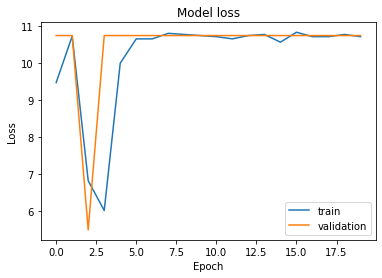

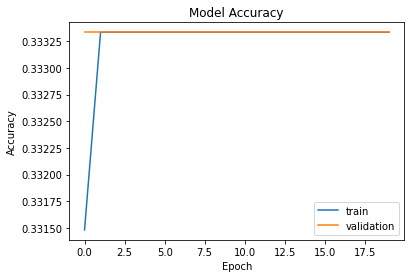

In [133]:
df_loss_acc = pd.DataFrame(transfer_history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(6,4)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(6,4)).set(xlabel='Epoch',ylabel='Accuracy')

6/6 [==============================] - 7s 1s/step
[[128.99435  -36.2515   -64.389496]
 [129.04057  -36.26661  -64.582085]
 [129.05273  -36.587498 -64.221306]
 [129.08488  -36.414894 -64.51347 ]
 [129.02399  -36.59115  -64.32045 ]
 [129.09428  -36.73998  -64.18532 ]
 [129.11775  -36.57697  -64.29181 ]
 [129.16086  -36.533157 -64.431076]
 [129.0981   -36.428097 -64.26777 ]
 [129.28838  -36.592175 -64.54079 ]
 [129.00406  -36.312485 -64.45907 ]
 [128.96979  -36.36297  -64.311966]
 [129.1782   -36.8951   -64.23422 ]
 [129.12129  -36.570484 -64.41524 ]
 [129.11331  -36.690002 -64.32243 ]
 [129.1036   -36.693325 -64.31175 ]
 [129.23106  -36.825077 -64.42462 ]
 [129.11456  -36.790848 -64.256096]
 [128.96657  -36.282913 -64.35424 ]
 [129.19553  -36.57748  -64.31053 ]
 [128.99043  -36.251724 -64.39471 ]
 [129.07948  -36.614044 -64.29051 ]
 [129.04272  -36.554047 -64.10605 ]
 [129.04018  -36.29759  -64.48413 ]
 [129.00032  -36.546875 -64.11546 ]
 [128.93979  -36.104736 -64.56684 ]
 [129.00903  -

[Text(0.5, 15.0, 'prediction'), Text(33.0, 0.5, 'actual')]

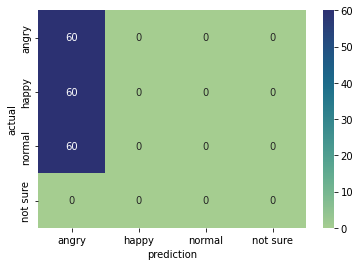

In [134]:
Y_pred = jap_pretrained_model.predict(X_test_norm)
Y_test_numpy = Y_test.numpy()
emotion_pred = []
emotion_test = []
print(Y_pred)
for i in range(len(Y_pred)):
    if (Y_pred[i][0] > 0.5):
        emotion_pred.append(0) # angry
    elif (Y_pred[i][1] > 0.5):
        emotion_pred.append(1) # happy
    elif (Y_pred[i][2] > 0.5):
        emotion_pred.append(2) # normal
    else:
        emotion_pred.append(3) # not decided

    if (Y_test_numpy[i][0] > 0.5):
        emotion_test.append(0)
    elif (Y_test_numpy[i][1] > 0.5):
        emotion_test.append(1)
    elif (Y_test_numpy[i][2] > 0.5):
        emotion_test.append(2)

emotion_test = tf.convert_to_tensor(emotion_test)
emotion_pred = tf.convert_to_tensor(emotion_pred)

confusion = tf.math.confusion_matrix(emotion_test, emotion_pred, num_classes = 4)

df=pd.DataFrame(confusion.numpy(),index=['angry', 'happy', 'normal', 'not sure'],columns=['angry', 'happy', 'normal', 'not sure'])
confusiton_map = sn.heatmap(df,annot=True, cmap='crest')
confusiton_map.set(xlabel="prediction", ylabel="actual")